# Challenge 2

In this challenge we will continue working with the `Pokemon` dataset. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemon are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.


## Problem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Importing the dataset
# reading a csv table into a variable
pokemon = pd.read_csv("pokemon.csv")

In [3]:
display(pokemon.head(5))

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemon?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

In [4]:
# What is the formula to compute Total?

In [5]:
pokemon['New_Total'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']

In [6]:
# To Check if there is no null in the row
pokemon['New_Total'].isnull().sum()

0

In [7]:
pokemon.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New_Total
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,405


In [8]:
# Does the formula work for all pokemon? --> Yes as there is zero different between Total & New Total 

In [9]:
pokemon['Total_Dif'] = pokemon['Total']- pokemon['New_Total']
pokemon['Total_Dif'].unique()

array([0])

## Problem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](../images/one-hot-encoding.png)

In [10]:
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New_Total,Total_Dif
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,318,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,405,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,525,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,625,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,309,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,405,0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,534,0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,634,0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,634,0
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,314,0


In [11]:
pokemon['Type 2'].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [12]:
# 1st Way from CHATGPT - using pd.get dummies

# Perform One Hot Encoding on 'Type 1' and 'Type 2'
type1_encoded = pd.get_dummies(pokemon['Type 1'], prefix='Type')
type2_encoded = pd.get_dummies(pokemon['Type 2'], prefix='Type')

# Combine the encoded fields
encoded_types = type1_encoded.add(type2_encoded, fill_value=0)

# Concatenate the new numerical variables to the original DataFrame
pokemon_encoded = pd.concat([pokemon, encoded_types], axis=1)

# Display the resulting DataFrame
pokemon_encoded.head(10)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0,1,0,0,0,1,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0,1,0,0,0,1,0,0,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0,1,0,0,0,1,0,0,0,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0,1,0,0,0,1,0,0,0,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0,0,0,0,0,0,0,0,0,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,0,0,0,0,0,0,0,0,0,0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,0,0,0,0,0,0,0,0,0,0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,0,0,0,0,0,0,0,0,0,0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,0,0,0,0,0,0,0,0,0,0
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,0,0,0,0,0,0,0,0,0,1


In [13]:
pd.set_option('display.max_columns', None)
pokemon_encoded.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New_Total,Total_Dif,Type_Bug,Type_Dark,Type_Dragon,Type_Electric,Type_Fairy,Type_Fighting,Type_Fire,Type_Flying,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,318,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,405,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,525,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,625,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,309,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Problem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
pokemon_matrix = pokemon_encoded.drop(['Name','Type 1','Type 2','HP','Attack','Defense','Sp. Atk','Sp. Def',
                                      'Speed','Generation','Legendary','New_Total','Total_Dif'], axis=1)
pokemon_matrix.head()

,#,Total,Type_Bug,Type_Dark,Type_Dragon,Type_Electric,Type_Fairy,Type_Fighting,Type_Fire,Type_Flying,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
0,1,318,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,2,405,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,3,525,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,3,625,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,4,309,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [16]:
correlation_matrix = pokemon_matrix.corr()
correlation_matrix

,#,Total,Type_Bug,Type_Dark,Type_Dragon,Type_Electric,Type_Fairy,Type_Fighting,Type_Fire,Type_Flying,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
#,1.000000,0.119813,-0.039786,0.100149,0.141996,0.016054,0.050889,0.047982,-0.009141,-0.032829,0.170270,0.042845,-0.046411,0.072143,-0.054071,-0.217015,0.003396,0.025601,0.094215,-0.101662
Total,0.119813,1.000000,-0.145781,0.056154,0.229705,0.020971,-0.036698,0.077786,0.078726,0.059383,0.003641,-0.052592,0.015060,0.060248,-0.105331,-0.090441,0.124688,0.032731,0.109703,-0.021665
Type_Bug,-0.039786,-0.145781,1.000000,-0.082062,-0.081200,-0.045111,-0.072148,-0.048645,-0.060536,0.064571,-0.058915,-0.034430,-0.063544,-0.070229,-0.120219,0.121210,-0.111968,-0.003706,0.047178,-0.123983
Type_Dark,0.100149,0.056154,-0.082062,1.000000,-0.003963,-0.067375,-0.059864,-0.007791,-0.020368,-0.022164,0.001484,-0.048339,-0.023480,-0.010163,-0.099751,-0.018227,-0.044327,-0.033493,-0.023978,-0.028548
Type_Dragon,0.141996,0.229705,-0.081200,-0.003963,1.000000,-0.024000,-0.035541,-0.068775,-0.038069,0.026237,-0.019410,-0.078818,0.052430,0.015173,-0.098702,-0.055525,-0.026557,-0.032360,-0.044417,-0.083285
Type_Electric,0.016054,0.020971,-0.045111,-0.067375,-0.024000,1.000000,-0.035541,-0.068775,-0.057104,-0.020407,-0.041592,-0.078818,-0.059420,-0.033382,-0.067737,-0.074838,-0.091928,-0.072188,-0.001346,-0.069109
Type_Fairy,0.050889,-0.036698,-0.072148,-0.059864,-0.035541,-0.035541,1.000000,-0.061108,-0.067651,-0.052669,-0.056665,-0.048756,-0.069360,-0.051232,-0.001720,-0.066495,0.027227,0.002212,0.013155,-0.067703
Type_Fighting,0.047982,0.077786,-0.048645,-0.007791,-0.068775,-0.068775,-0.061108,1.000000,0.051130,-0.086119,-0.065792,-0.051171,-0.080531,-0.059483,-0.071687,-0.039613,0.000596,-0.055090,-0.005161,-0.073778
Type_Fire,-0.009141,0.078726,-0.060536,-0.020368,-0.038069,-0.057104,-0.067651,0.051130,1.000000,-0.028855,-0.013459,-0.108248,-0.022621,-0.065851,-0.085097,-0.085471,-0.061243,-0.064677,-0.056108,-0.114850
Type_Flying,-0.032829,0.059383,0.064571,-0.022164,0.026237,-0.020407,-0.052669,-0.086119,-0.028855,1.000000,-0.061555,-0.081366,-0.060578,-0.049498,0.125506,-0.067950,-0.063872,-0.048221,-0.081400,-0.092030


<Axes: >

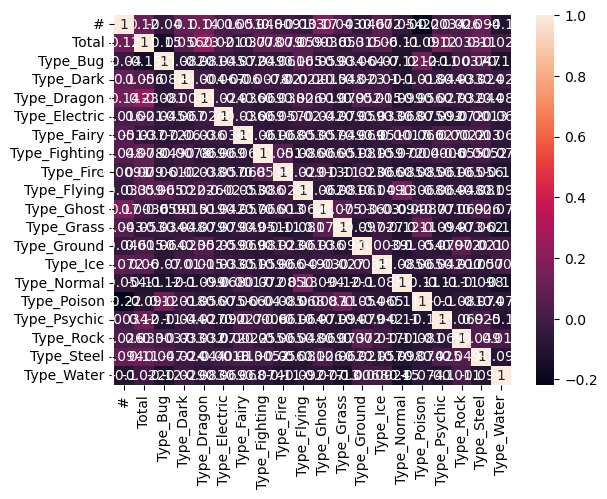

In [17]:
sns.heatmap(correlation_matrix,annot=True)


In [18]:
correlation_with_total = correlation_matrix['Total']

In [20]:
sorted_correlations = correlation_with_total.abs().sort_values(ascending=False)
print(sorted_correlations)

Total            1.000000
Type_Dragon      0.229705
Type_Bug         0.145781
Type_Psychic     0.124688
#                0.119813
Type_Steel       0.109703
Type_Normal      0.105331
Type_Poison      0.090441
Type_Fire        0.078726
Type_Fighting    0.077786
Type_Ice         0.060248
Type_Flying      0.059383
Type_Dark        0.056154
Type_Grass       0.052592
Type_Fairy       0.036698
Type_Rock        0.032731
Type_Water       0.021665
Type_Electric    0.020971
Type_Ground      0.015060
Type_Ghost       0.003641
Name: Total, dtype: float64


So the Top 3  would be 
Type_Dragon      0.229705
Type_Bug         0.145781
Type_Psychic     0.124688

# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [ ]:
# your code here